In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
from pylab import rcParams
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib.ticker import MaxNLocator

save_figures_to_latex = False
figures_path = '../../latex1/figures'     # to change if notebook is used in future exercises
folder_path = 'results' # sufficient to be folder name since its in the same folder      

In [3]:
rcParams['figure.figsize'] = 6, 4
plt.rc('text', usetex=True)
plt.rcParams['text.usetex']=True
plt.rc('font', family='sans-serif', weight='bold')

SMALL_SIZE = 7
MEDIUM_SIZE = 9
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.dpi'] = 1000

In [4]:
import os
import pandas as pd

txt_files = [file for file in os.listdir() if file.endswith('.csv')]

dataframes = {}
regex_pattern = r'_n_(\d+)_m_(\d+)\.txt'
for txt_file in txt_files:
    dataframe_name = os.path.splitext(txt_file)[0]  # Use the file name without extension as DataFrame name
    dataframes[dataframe_name] = pd.read_csv(txt_file, delimiter='\,', header=0, index_col=False, engine='python')  # Use the first row as column names
    dataframes[dataframe_name].reset_index()
    dataframes[dataframe_name][['n', 'm']] = dataframes[dataframe_name]['filename'].str.extract(regex_pattern).astype(int)

Unique 'n' values: [120 140 160 180 200 250 300 320 322 329 330 345 347 361]
n_colors dictionary: {120: (0.9686274509803922, 0.984313725490196, 1.0, 1.0), 140: (0.9101883890811227, 0.9469127258746636, 0.9812995001922338, 1.0), 160: (0.8495501730103806, 0.9075432525951557, 0.9616147635524798, 1.0), 180: (0.7904959630911188, 0.8681737793156478, 0.9419300269127259, 1.0), 200: (0.7063437139561707, 0.8290196078431372, 0.9127104959630911, 1.0), 250: (0.6047058823529413, 0.7839753940792004, 0.8791387927720108, 1.0), 300: (0.47921568627450983, 0.7150788158400615, 0.8520722798923491, 1.0), 320: (0.37168781237985393, 0.6496270665128797, 0.8205151864667436, 1.0), 322: (0.27080353710111493, 0.5807304882737409, 0.7811457131872357, 1.0), 329: (0.18726643598615916, 0.5009919261822375, 0.7396078431372549, 1.0), 330: (0.11480199923106507, 0.42443675509419465, 0.6951941560938102, 1.0), 345: (0.05328719723183391, 0.34569780853517873, 0.6336793540945791, 1.0), 347: (0.03137254901960784, 0.2653748558246828

/tmp/ipykernel_16453/103770409.py:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Number of Vertices', orientation="vertical")


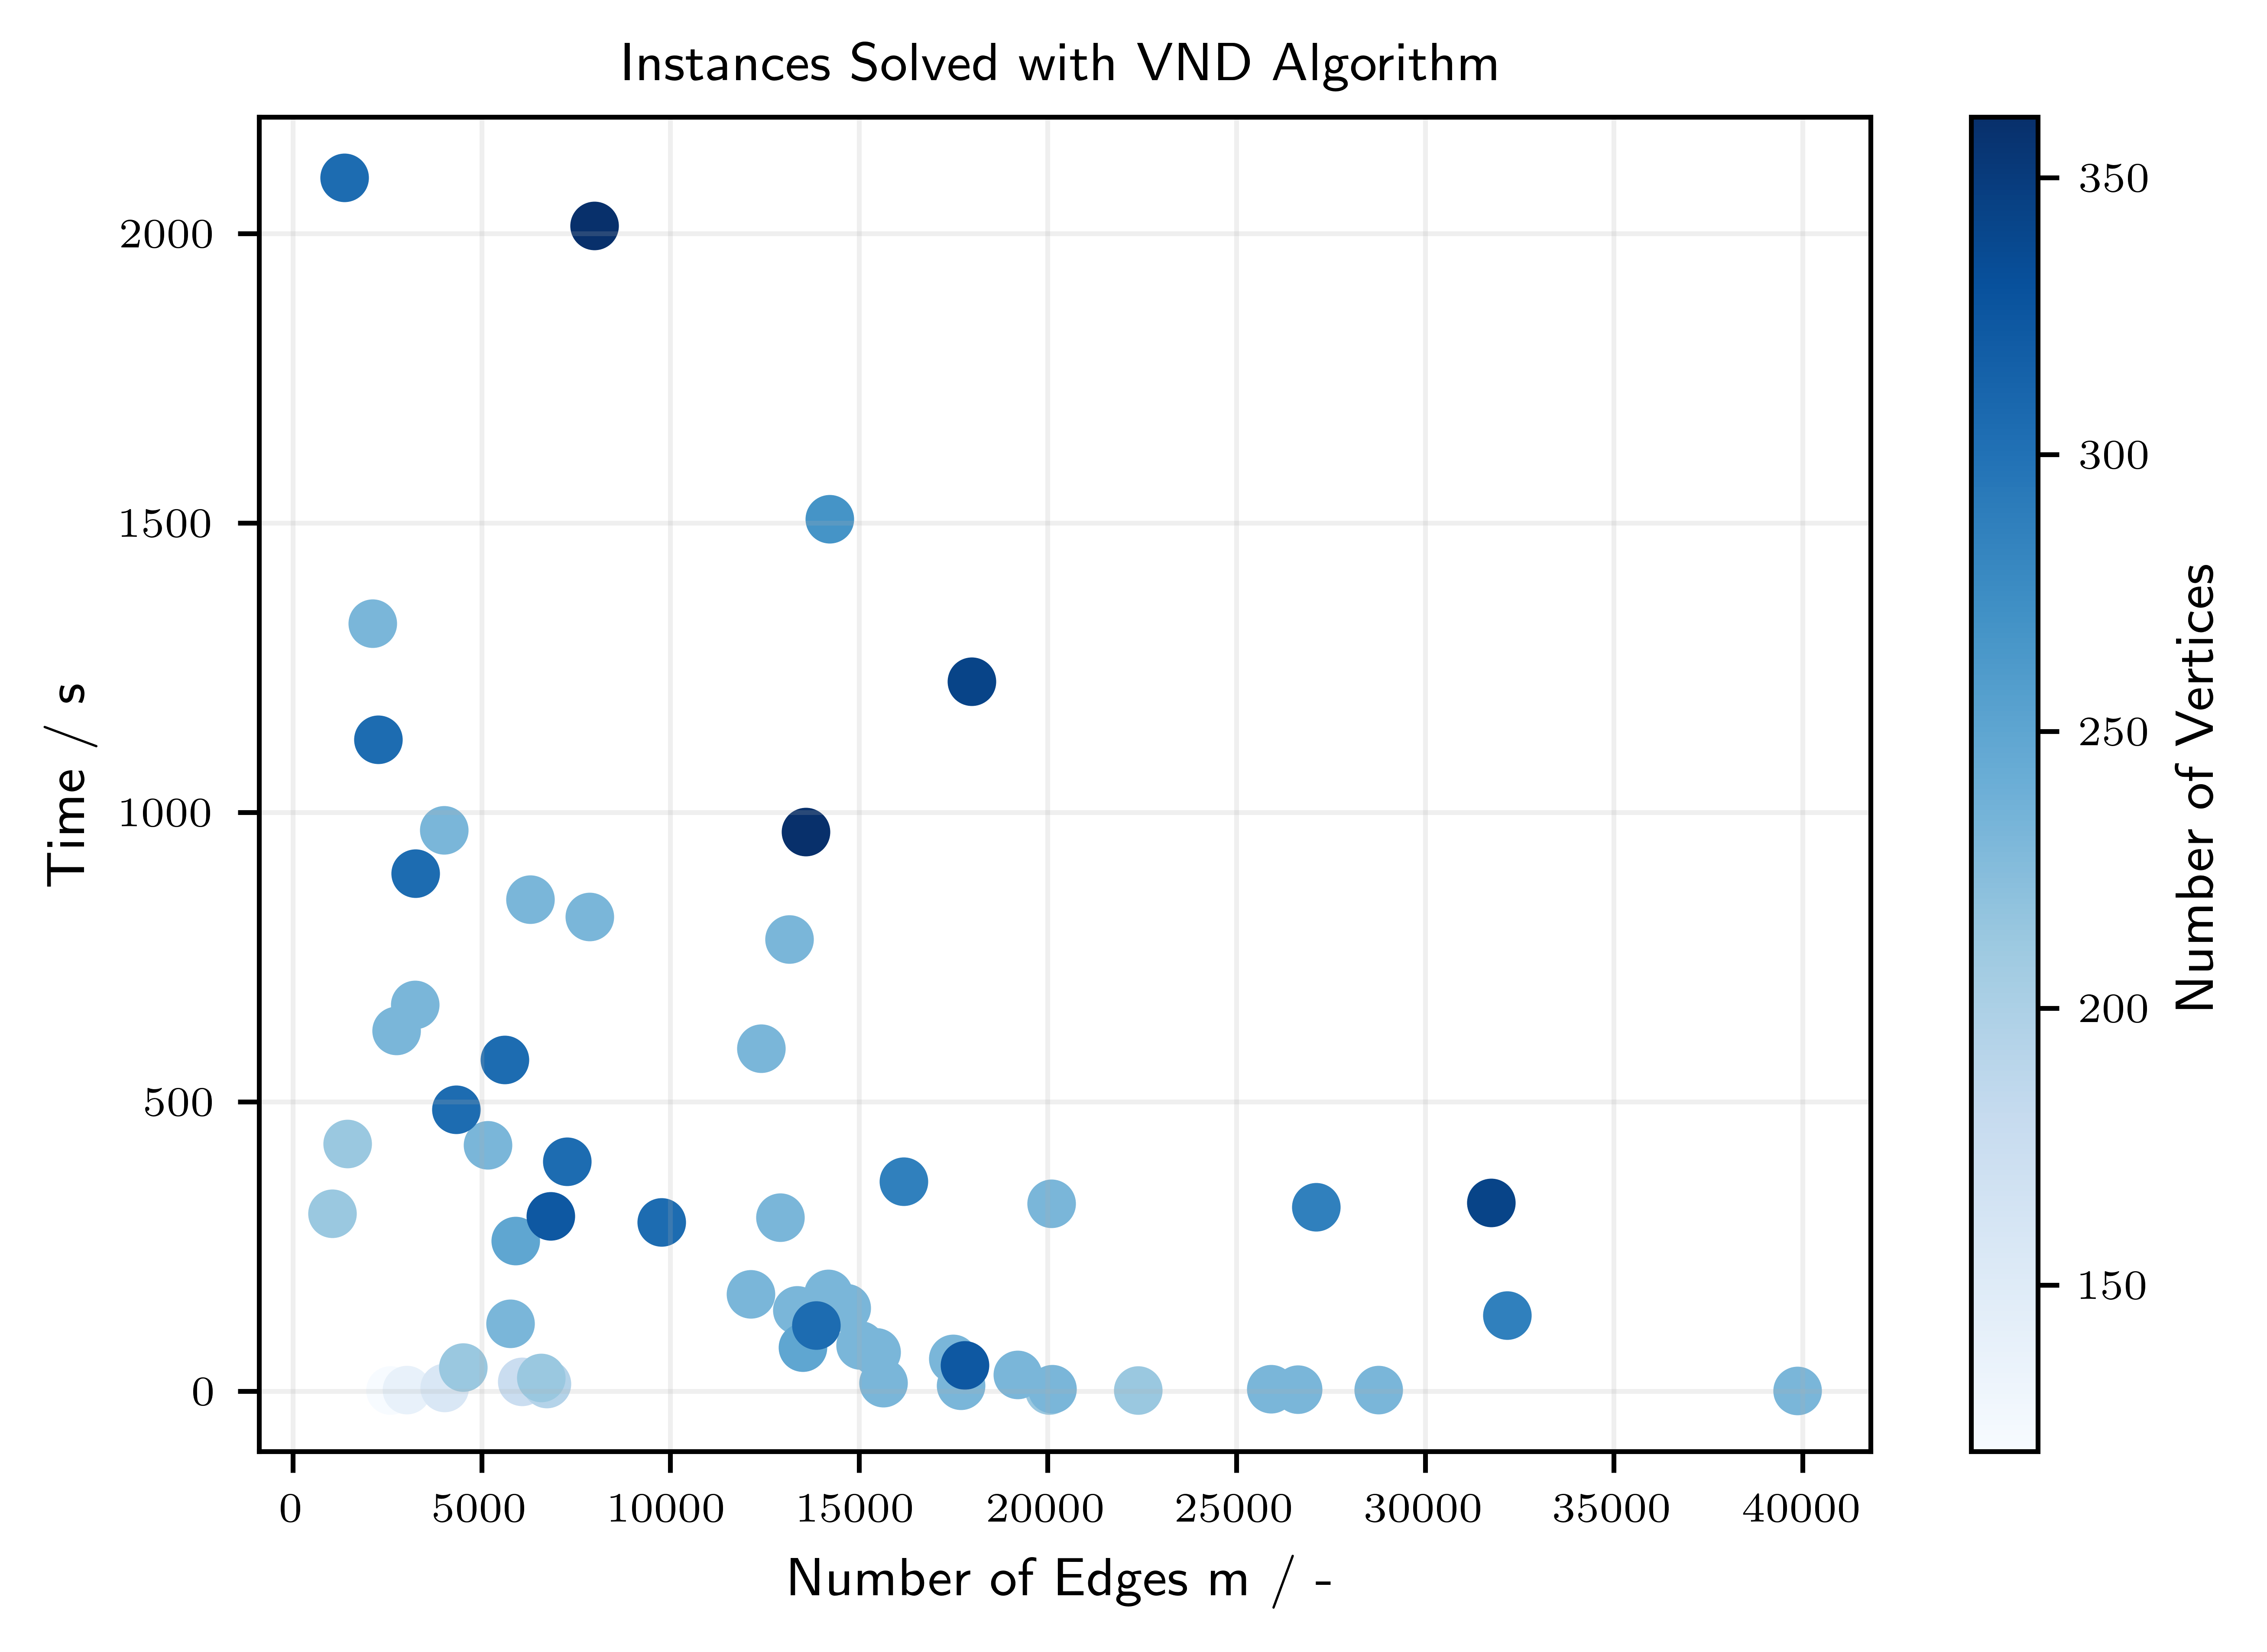

In [5]:
df = dataframes["full_run"]

# Assuming 'x_column' and 'y_column' are the columns you want to plot
x_column = 'm'
y_column = 'time'

unique_ns = df['n'].unique()
cmap = plt.cm.get_cmap('Blues')
n_colors = {unique_n: cmap(i / (len(unique_ns) - 1)) for i, unique_n in enumerate(unique_ns)}

print("Unique 'n' values:", unique_ns)
print("n_colors dictionary:", n_colors)

# Create a ScalarMappable to map data values to colors
norm = colors.Normalize(vmin=df['n'].min(), vmax=df['n'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

plt.grid(alpha=0.2)
for n, n_df in df.groupby('n'):
    x = n_df[x_column]
    y = n_df[y_column]
    color = n_colors[n]
    
    plt.scatter(n_df[x_column], n_df[y_column], label=f'n = {n}', marker='o', color=color, s=50)

# Add colorbar
cbar = plt.colorbar(sm, label='Number of Vertices', orientation="vertical")
cbar.set_ticks(unique_ns)
cbar.set_ticklabels(unique_ns)
cbar_locator = MaxNLocator(nbins=5)  # Set the number of ticks here
cbar.locator = cbar_locator
cbar.update_ticks()

plt.xlabel("Number of Edges m / -")
plt.ylabel("Time / s")
plt.title("Instances Solved with VND Algorithm")
plt.savefig("../../latex1/figures/vnd_edges_vs_time.pdf", format='pdf')


Unique 'n' values: [120 140 160 180 200 250 300 320 322 329 330 345 347 361]
n_colors dictionary: {120: (0.9686274509803922, 0.984313725490196, 1.0, 1.0), 140: (0.9101883890811227, 0.9469127258746636, 0.9812995001922338, 1.0), 160: (0.8495501730103806, 0.9075432525951557, 0.9616147635524798, 1.0), 180: (0.7904959630911188, 0.8681737793156478, 0.9419300269127259, 1.0), 200: (0.7063437139561707, 0.8290196078431372, 0.9127104959630911, 1.0), 250: (0.6047058823529413, 0.7839753940792004, 0.8791387927720108, 1.0), 300: (0.47921568627450983, 0.7150788158400615, 0.8520722798923491, 1.0), 320: (0.37168781237985393, 0.6496270665128797, 0.8205151864667436, 1.0), 322: (0.27080353710111493, 0.5807304882737409, 0.7811457131872357, 1.0), 329: (0.18726643598615916, 0.5009919261822375, 0.7396078431372549, 1.0), 330: (0.11480199923106507, 0.42443675509419465, 0.6951941560938102, 1.0), 345: (0.05328719723183391, 0.34569780853517873, 0.6336793540945791, 1.0), 347: (0.03137254901960784, 0.2653748558246828

/tmp/ipykernel_16453/1507204724.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Number of Vertices', orientation="vertical")


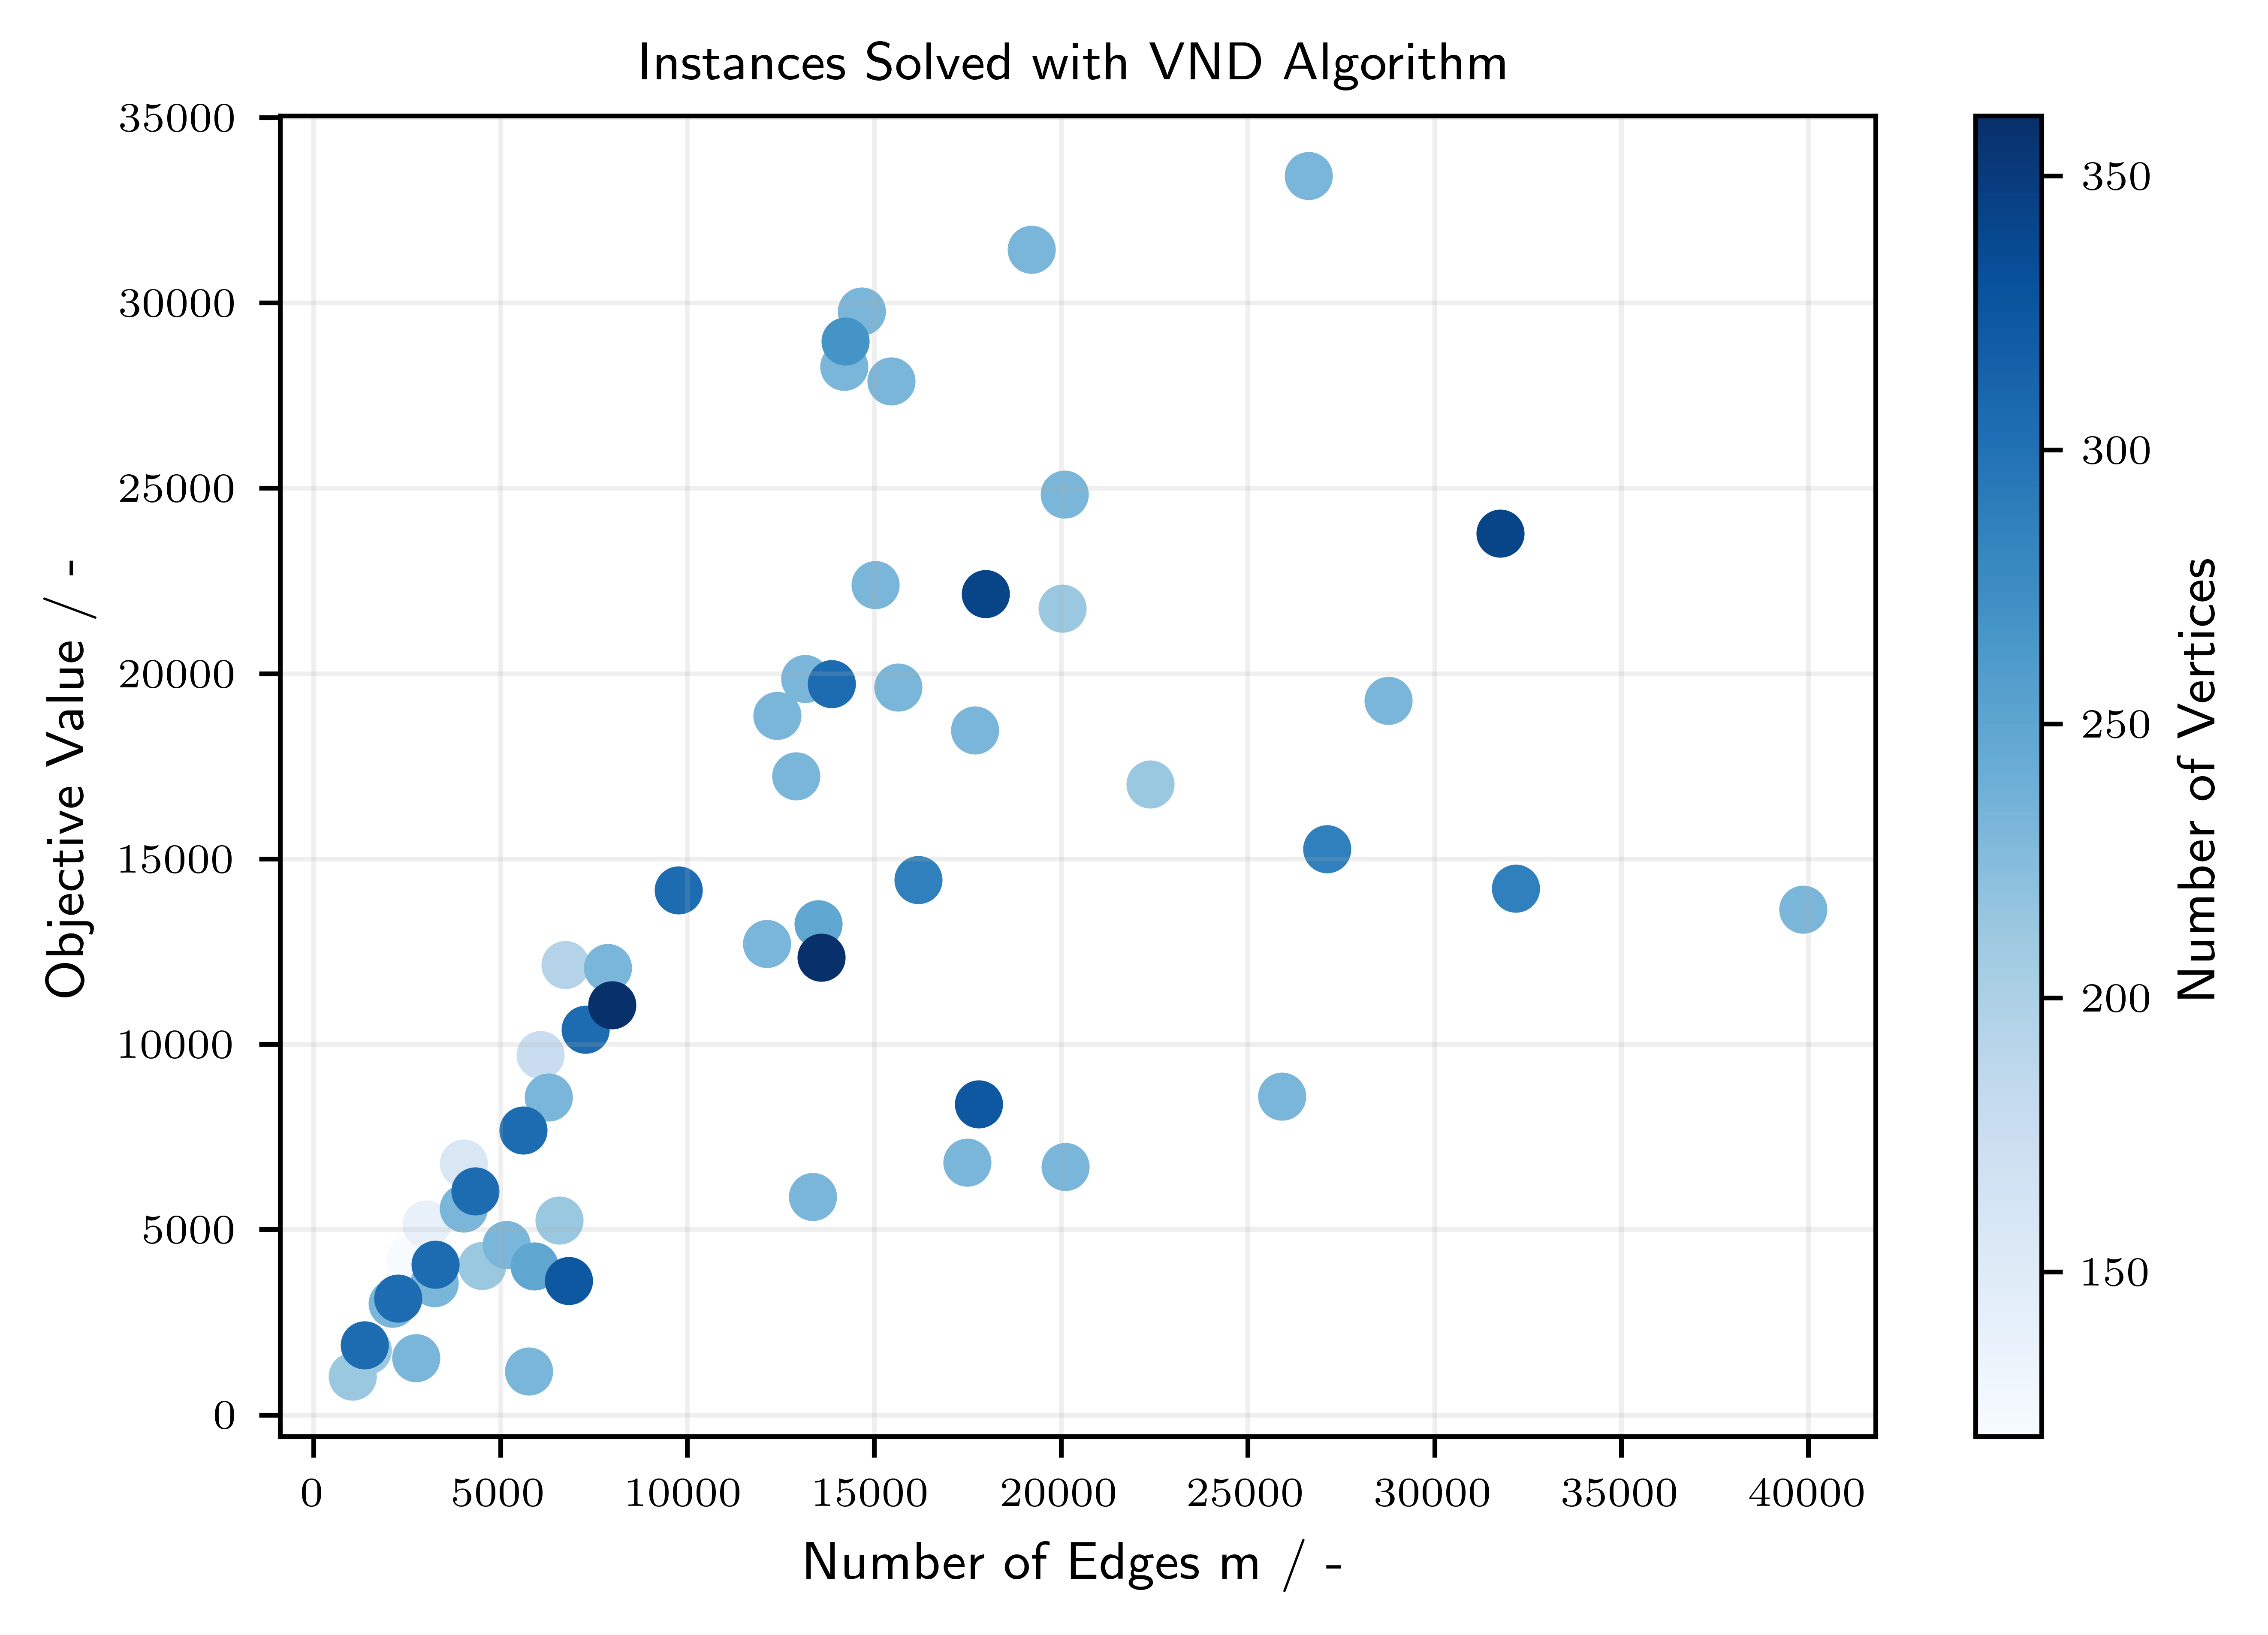

In [6]:

# Assuming 'x_column' and 'y_column' are the columns you want to plot
x_column = 'm'
y_column = 'obj_val'

unique_ns = df['n'].unique()
cmap = plt.cm.get_cmap('Blues')
n_colors = {unique_n: cmap(i / (len(unique_ns) - 1)) for i, unique_n in enumerate(unique_ns)}

print("Unique 'n' values:", unique_ns)
print("n_colors dictionary:", n_colors)

# Create a ScalarMappable to map data values to colors
norm = colors.Normalize(vmin=df['n'].min(), vmax=df['n'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

plt.grid(alpha=0.2)
for n, n_df in df.groupby('n'):
    x = n_df[x_column]
    y = n_df[y_column]
    color = n_colors[n]
    
    plt.scatter(n_df[x_column], n_df[y_column], label=f'n = {n}', marker='o', color=color, s=50)

# Add colorbar
cbar = plt.colorbar(sm, label='Number of Vertices', orientation="vertical")
cbar.set_ticks(unique_ns)
cbar.set_ticklabels(unique_ns)
cbar_locator = MaxNLocator(nbins=5)  # Set the number of ticks here
cbar.locator = cbar_locator
cbar.update_ticks()

plt.xlabel("Number of Edges m / -")
plt.ylabel("Objective Value / -")
plt.title("Instances Solved with VND Algorithm")
plt.savefig("../../latex1/figures/vnd_edges_vs_objVal.pdf", format='pdf')